In [136]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [137]:
df = pd.read_csv("../../survey data/Technology_Acceptance_Model_TAM_.csv")
grade = pd.read_csv("../../Final_Grade/grade_combined.csv")

In [138]:
df=df.drop(df.columns[[0,1,2,3,4,5,8]],axis=1)
# df.head()

index=2
for i in range(index,len(df.columns)):
    df.columns.values[i]=f"Q{i-1}"

df['Full name'] = df['Full name'].str.lower()
df.head()


ID           Full name  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  ...  Q18  Q19  \
0  148  rikesh karmacharya   5   5   5   5   5   4   3   4  ...    3    4   
1  442      bibhusan baral   4   3   2   4   4   4   4   4  ...    4    4   
2  473        satyam karki   4   2   4   4   3   4   4   3  ...    3    4   
3  478    shubh raj dhital   4   5   5   5   4   4   4   4  ...    4    5   
4  525      roshan shreesh   4   3   4   4   2   3   4   4  ...    3    3   

   Q20  Q21  Q22  Q23  Q24  Q25  Q26  Q27  
0    3    4    4    4    2    4    4    1  
1    4    5    4    4    2    4    4    2  
2    2    3    4    3    1    3    4    1  
3    4    4    4    4    2    4    4    1  
4    2    3    4    3    1    3    4    1  

[5 rows x 29 columns]

In [139]:
inversion=[24, 27]

def invert_score(x):
    if x==1:return 5
    if x==2:return 4
    if x==3:return 3
    if x==4:return 2
    if x==5:return 1

for i in inversion :
    df.iloc[:,i+1]=df.iloc[:,i+1].apply(invert_score)

df.head()

ID           Full name  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  ...  Q18  Q19  \
0  148  rikesh karmacharya   5   5   5   5   5   4   3   4  ...    3    4   
1  442      bibhusan baral   4   3   2   4   4   4   4   4  ...    4    4   
2  473        satyam karki   4   2   4   4   3   4   4   3  ...    3    4   
3  478    shubh raj dhital   4   5   5   5   4   4   4   4  ...    4    5   
4  525      roshan shreesh   4   3   4   4   2   3   4   4  ...    3    3   

   Q20  Q21  Q22  Q23  Q24  Q25  Q26  Q27  
0    3    4    4    4    4    4    4    5  
1    4    5    4    4    4    4    4    4  
2    2    3    4    3    5    3    4    5  
3    4    4    4    4    4    4    4    5  
4    2    3    4    3    5    3    4    5  

[5 rows x 29 columns]

In [140]:
df["score"]=df.iloc[:,2:11].mean(axis=1)
df["round"]=df["score"].apply(lambda x: round(x))
df.head()

ID           Full name  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  ...  Q20  Q21  \
0  148  rikesh karmacharya   5   5   5   5   5   4   3   4  ...    3    4   
1  442      bibhusan baral   4   3   2   4   4   4   4   4  ...    4    5   
2  473        satyam karki   4   2   4   4   3   4   4   3  ...    2    3   
3  478    shubh raj dhital   4   5   5   5   4   4   4   4  ...    4    4   
4  525      roshan shreesh   4   3   4   4   2   3   4   4  ...    2    3   

   Q22  Q23  Q24  Q25  Q26  Q27     score  round  
0    4    4    4    4    4    5  4.333333      4  
1    4    4    4    4    4    4  3.666667      4  
2    4    3    5    3    4    5  3.666667      4  
3    4    4    4    4    4    5  4.444444      4  
4    4    3    5    3    4    5  3.555556      4  

[5 rows x 31 columns]

In [141]:
df['Name'] = df['Full name'].str.lower()
df = df.drop(columns=['Full name'])

<Axes: >

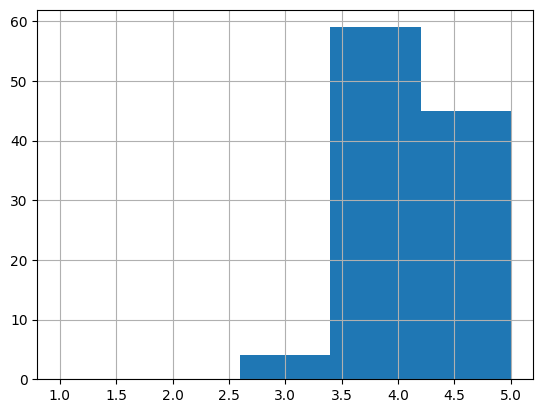

In [142]:
import matplotlib as plt
import seaborn as sns

df["score"].hist(bins=5,range=(1,5))


<Axes: xlabel='score', ylabel='Density'>

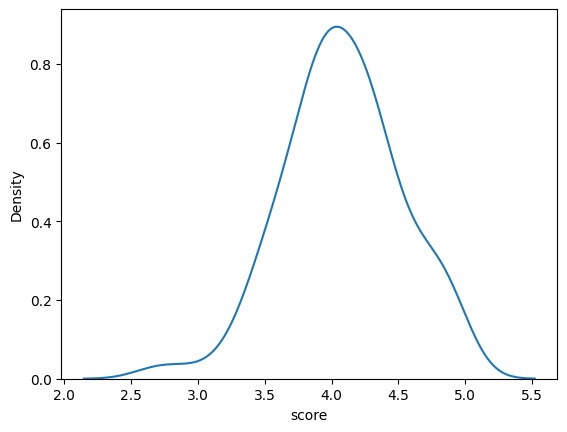

In [143]:
sns.kdeplot(df['score'],label="Density")

## Grade combined with tam acceptance

In [144]:
# Define a dictionary to map old names to new names
name_changes = {
    'ankit kumar karna': 'ankit karna',
    'anup raj niroula': 'anup niroula',
    'hrishav raghu shrestha': 'hrishav shrestha',
    'aadil tuladhar': 'adil tuladhar',
    'nischal chand': 'nischal thakuri',
    'shreeyash laya-la shrestha': 'shreeyash shrestha',
}

# Apply the name changes
df['Name'] = df['Name'].replace(name_changes)


In [145]:
# Merge dataframes on the 'Name' column
tam_grade = pd.merge(df, grade[['Name', 'Score', 'GRADE']], on='Name', how='left')

In [146]:

tam_grade['grade_score'] = tam_grade['Score']
tam_grade = tam_grade.drop(columns=['Score'])

In [147]:
tam_grade.isna().sum()

ID             0
Q1             0
Q2             0
Q3             0
Q4             0
Q5             0
Q6             0
Q7             0
Q8             0
Q9             0
Q10            0
Q11            0
Q12            0
Q13            0
Q14            0
Q15            0
Q16            0
Q17            0
Q18            0
Q19            0
Q20            0
Q21            0
Q22            0
Q23            0
Q24            0
Q25            0
Q26            0
Q27            0
score          0
round          0
Name           0
GRADE          0
grade_score    0
dtype: int64

In [148]:
nan_grades = tam_grade[tam_grade['GRADE'].isna()]
print("\nStudents without grades:")
print(nan_grades['Name'])


Students without grades:
Series([], Name: Name, dtype: object)


There were some name inconsistent between name in grade and in the survey data

In [149]:
tam_grade

ID  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  ...  Q23  Q24  Q25  Q26  Q27  \
0     148   5   5   5   5   5   4   3   4   3  ...    4    4    4    4    5   
1     442   4   3   2   4   4   4   4   4   4  ...    4    4    4    4    4   
2     473   4   2   4   4   3   4   4   3   5  ...    3    5    3    4    5   
3     478   4   5   5   5   4   4   4   4   5  ...    4    4    4    4    5   
4     525   4   3   4   4   2   3   4   4   4  ...    3    5    3    4    5   
..    ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...   
103  2255   4   3   4   4   4   4   4   4   5  ...    4    4    4    4    5   
104  2256   4   4   4   4   5   4   4   3   3  ...    3    4    4    4    5   
105  2257   3   3   4   4   4   3   3   4   5  ...    3    5    3    3    5   
106  2258   4   3   3   4   4   4   2   3   4  ...    3    4    4    4    4   
107  2260   5   5   5   5   5   5   4   5   5  ...    5    5    5    5    5   

        score  round                Name  GRADE  grade_score  
0    4.333333      4  rikesh karmacharya     A-         76.0  
1    3.666667      4      bibhusan baral      A         80.0  
2    3.666667      4        satyam karki     A-         75.0  
3    4.444444      4    shubh raj dhital      B         67.0  
4    3.555556      4      roshan shreesh     C+         55.0  
..        ...    ...                 ...    ...          ...  
103  4.000000      4      minusha gurung     A-         78.0  
104  3.888889      4       pratik khadka     A-         75.0  
105  3.666667      4        niraj tamang     B+         74.0  
106  3.444444      3         bishal shah     A-         78.0  
107  4.888889      5     asmita dhungana     A-         79.0  

[108 rows x 33 columns]

In [150]:
# Group by 'round' and calculate the 'average_tam_score'

# Group by 'round' and calculate the mean, max, min, Q1, and Q3 'Score'
aggregated_scores = tam_grade.groupby('round')['grade_score'].agg(['mean', 'max', 'min', 'quantile', lambda x: x.quantile(0.75)]).reset_index()


# Rename columns for better readability
aggregated_scores = aggregated_scores.rename(columns={
    'round' : 'TAM Score',
    'mean': 'Average_Score',
    'max': 'Highest_Score',
    'min': 'Lowest_Score',
    'quantile': 'Q1_Score',
    '<lambda_0>': 'Q3_Score'
})

# Display the resulting dataframe
print(aggregated_scores)

   TAM Score  Average_Score  Highest_Score  Lowest_Score  Q1_Score  Q3_Score
0          3      74.000000           84.0          60.0      75.5     77.75
1          4      76.237500           92.0          55.0      76.0     79.25
2          5      77.833333           92.0          62.0      79.0     80.75


In [151]:
# Define function to map scores to grades
def assign_grade(score):
    if score >= 80:
        return 'A'
    elif 75 <= score < 80:
        return 'A-'
    elif 70 <= score < 75:
        return 'B+'
    elif 65 <= score < 70:
        return 'B'
    elif 60 <= score < 65:
        return 'B-'
    elif 55 <= score < 60:
        return 'C+'
    elif 50 <= score < 55:
        return 'C'
    elif 45 <= score < 50:
        return 'C-'
    else:
        return 'F'

In [152]:

# Apply the function to the 'Score' column to create the 'Average_Grade' column
aggregated_scores['Average_Grade'] = aggregated_scores['Average_Score'].apply(assign_grade)


### Classified scores of Students with various Scores in TAM survey

In [153]:
aggregated_scores

TAM Score  Average_Score  Highest_Score  Lowest_Score  Q1_Score  Q3_Score  \
0          3      74.000000           84.0          60.0      75.5     77.75   
1          4      76.237500           92.0          55.0      76.0     79.25   
2          5      77.833333           92.0          62.0      79.0     80.75   

  Average_Grade  
0            B+  
1            A-  
2            A-

# Model Training and Evaluation

## Using Regression Model

### Linear Regression Model

In [154]:

def train_linear_regression(X_train, y_train):
    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

### Random Forest Model

In [155]:
def train_random_forest(X_train, y_train):
    # Initialize and train the model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model


### Evaluation

In [156]:
def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    # Calculate metrics
    
    #mean square error
    mse = mean_squared_error(y_test, y_pred)
    
    #r2 score
    r2 = r2_score(y_test, y_pred)

    return mse, r2, y_pred

### Visual Plot

In [157]:
# Function to plot the results
def plot_results(X_test, y_test, y_pred, title):
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.scatter(X_test, y_pred, color='red', label='Predicted')
    plt.title(title)
    plt.xlabel('Survey Score')
    plt.ylabel('Grade Score')
    plt.legend()
    plt.show()

### Split Data with Train and Test

In [158]:
def split_data(df, test_size=0.2, random_state=42):
    X = df[['score']]
    y = df['grade_score']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

### Implementing Model and evaluation

Linear Regression MSE: 59.04, R2: -0.30


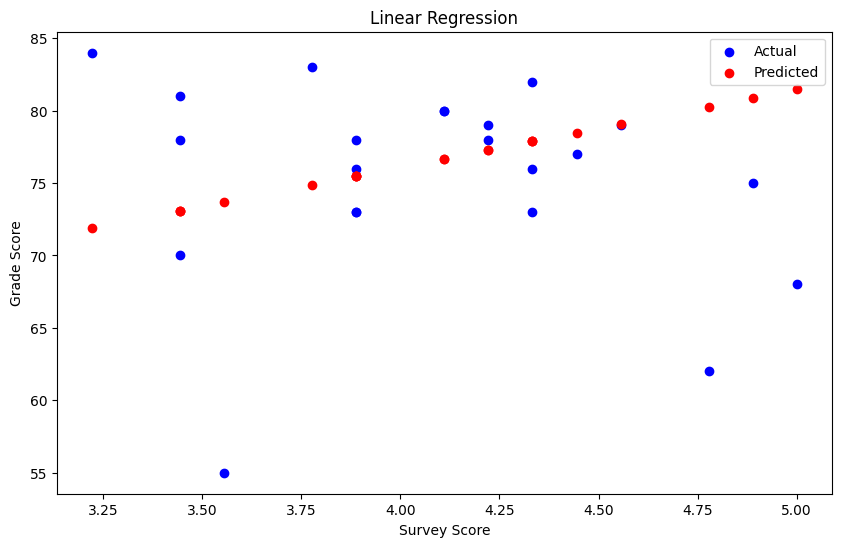

Random Forest Regression MSE: 51.09, R2: -0.13


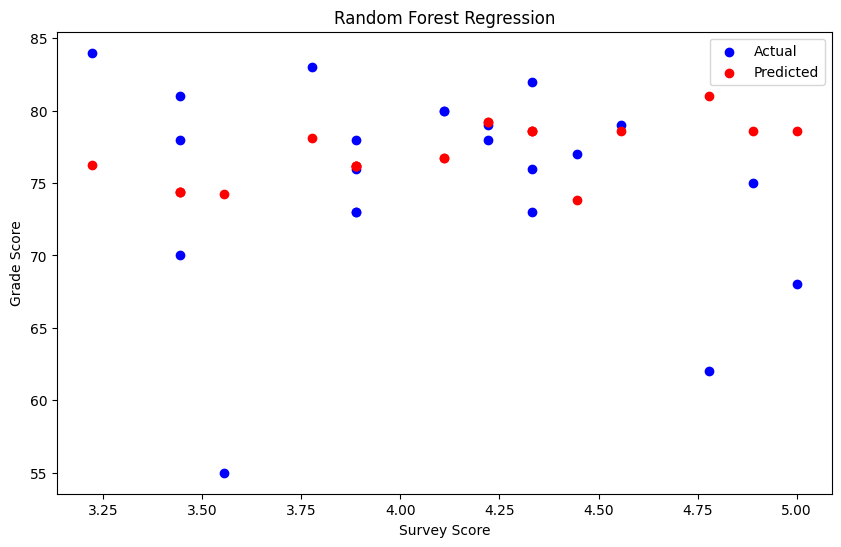

In [159]:
import matplotlib.pyplot as plt

# Split the data
X_train, X_test, y_train, y_test = split_data(tam_grade)

# Train and evaluate Linear Regression
lr_model = train_linear_regression(X_train, y_train)
mse_lr, r2_lr, y_pred_lr = evaluate_model(lr_model, X_test, y_test)
print(f'Linear Regression MSE: {mse_lr:.2f}, R2: {r2_lr:.2f}')
plot_results(X_test, y_test, y_pred_lr, 'Linear Regression')

# Train and evaluate Random Forest Regression
rf_model = train_random_forest(X_train, y_train)
mse_rf, r2_rf, y_pred_rf = evaluate_model(rf_model, X_test, y_test)
print(f'Random Forest Regression MSE: {mse_rf:.2f}, R2: {r2_rf:.2f}')
plot_results(X_test, y_test, y_pred_rf, 'Random Forest Regression')

## Using CLassification Models

### logistic Regression

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

def train_and_test_classification_model(X, y, test_size=0.2, random_state=42):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Train the classification model
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)

    # Test the model
    y_pred = classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    return accuracy, report

# Use grades as features and rounded survey scores as labels
X = tam_grade[['grade_score']]
y = tam_grade['round']

# Train and test the classification model
accuracy, report = train_and_test_classification_model(X, y)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(report)


Accuracy: 0.59
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.62      0.93      0.74        14
           5       0.00      0.00      0.00         4

    accuracy                           0.59        22
   macro avg       0.21      0.31      0.25        22
weighted avg       0.39      0.59      0.47        22



/home/ranjan/Projects/MOOC/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ranjan/Projects/MOOC/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ranjan/Projects/MOOC/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

The logistic regression model achieved an accuracy of 0.64 on the test data. However, the classification report reveals that the model performs poorly on certain classes. For instance, it fails to predict any instances of class 3 and class 5, resulting in precision, recall, and F1-score of 0.00 for these classes. The model performs relatively better on class 4 with a precision of 0.67 and recall of 0.93.

It's important to note the warning messages regarding precision being ill-defined due to no predicted samples for certain classes. This indicates that the model may require further optimization or alternative approaches to improve its performance, especially for the minority classes.

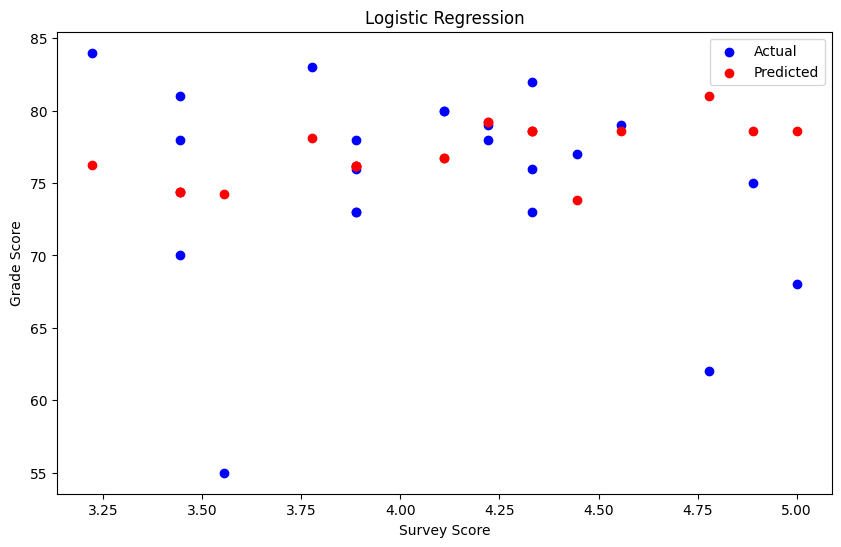

In [161]:
plot_results(X_test, y_test, y_pred_rf, 'Logistic Regression')

### SVM and GradientBoostingRegressor

Support Vector Regression MSE: 50.30, R2: -0.11


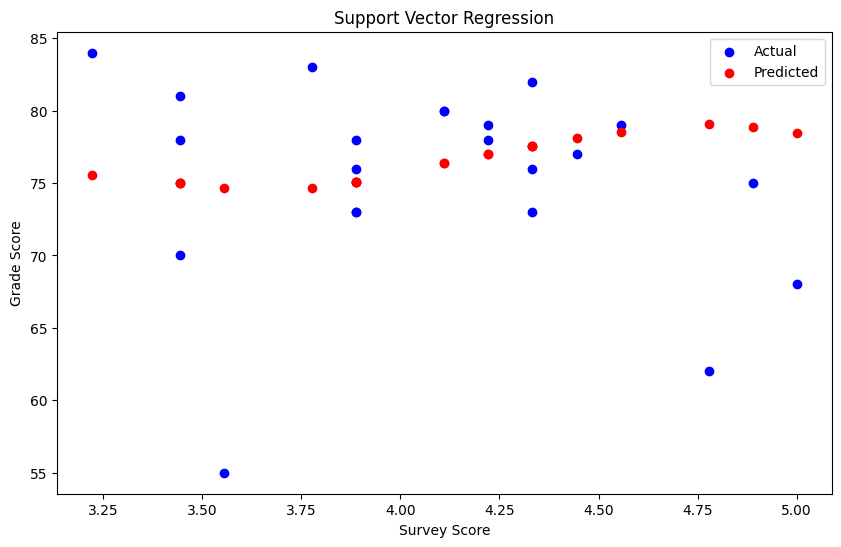

Gradient Boosting Regression MSE: 50.59, R2: -0.12


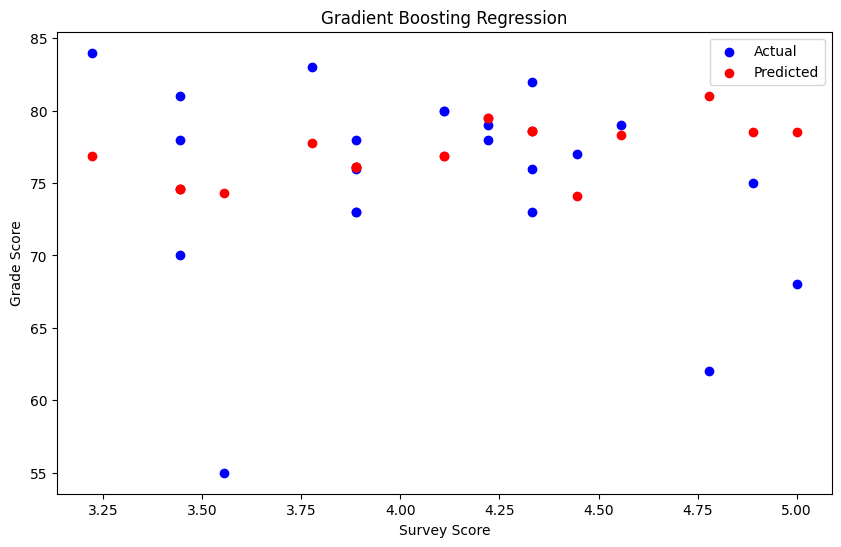

In [162]:
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

# Function to train Support Vector Regression
def train_svr(X_train, y_train):

    model = SVR(kernel='rbf')
    model.fit(X_train, y_train)
    return model

# Function to train Gradient Boosting Regression
def train_gradient_boosting(X_train, y_train):
    model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model

# Split the data
X_train, X_test, y_train, y_test = split_data(tam_grade)

# Train and evaluate Support Vector Regression
svr_model = train_svr(X_train, y_train)
mse_svr, r2_svr, y_pred_svr = evaluate_model(svr_model, X_test, y_test)
print(f'Support Vector Regression MSE: {mse_svr:.2f}, R2: {r2_svr:.2f}')

# Plot results for Support Vector Regression
plot_results(X_test, y_test, y_pred_svr, 'Support Vector Regression')

# Train and evaluate Gradient Boosting Regression
gb_model = train_gradient_boosting(X_train, y_train)
mse_gb, r2_gb, y_pred_gb = evaluate_model(gb_model, X_test, y_test)
print(f'Gradient Boosting Regression MSE: {mse_gb:.2f}, R2: {r2_gb:.2f}')

# Plot results for Gradient Boosting Regression
plot_results(X_test, y_test, y_pred_gb, 'Gradient Boosting Regression')

# Findings and Discussion

### Regression Models:

|Model|MSE|R²|
|:--|:--|:--|
|Linear Regression|59.04|-0.30|
|Random Forest Regression|51.09|-0.13|
|Support Vector Regression|50.30|-0.11|
|Gradient Boosting Regression|50.59|-0.12|

### Logistic Regression:

|Metric|Class 3|Class 4|Class 5|Accuracy|Macro Avg|Weighted Avg|
|:--|:--|:--|:--|:--|:--|:--|
|Precision|0.00|0.62|0.00|0.59|0.21|0.39|
|Recall|0.00|0.93|0.00|-|0.31|0.59|
|F1-Score|0.00|0.74|0.00|-|0.25|0.47|
|Support|4|14|4|22|22|22|

### Discussion
Random Forest Regression and SVR had similar performance, with slightly better MSE and less negative R² values compared to Linear Regression, indicating marginally better fitting of the data. Logistic Regression had moderate accuracy (0.59), but similar to the other surveys, it predominantly predicted class 4 correctly while failing for classes 3 and 5.